## RANDOM FOREST REGRESSION FOR HOUSE PRICE


#Impor modul yang diperlukan


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Mengambil data yang sudah dibersihkan

In [2]:
from google.colab import files
uploaded = files.upload()

Saving data_clean2.csv to data_clean2.csv


In [3]:
df = pd.read_csv('./data_clean2.csv')

In [4]:
df.shape

(496, 13)

#Memisahkan variabel bebas dengan variabel terikat

In [5]:

# Pisahkan variabel Y
y = df['price']

# Pisahkan variabel dari fitur-fitur lainnya
X = df.drop(columns=['price'])

In [6]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0.476289,0.6,0.666667,1.000000,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.5
1,0.443299,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,1.0,1.0
2,0.336770,0.6,0.333333,0.333333,1.0,0.0,0.0,0.0,1.0,0.333333,1.0,0.5
3,0.422680,0.4,0.333333,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.5
4,0.340206,0.6,0.333333,0.333333,1.0,1.0,1.0,0.0,1.0,0.333333,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
491,0.092784,0.2,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.666667,0.0,0.0
492,0.051546,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.5
493,0.135395,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
494,0.086598,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0


In [7]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0.476289,0.6,0.666667,1.000000,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.5
1,0.443299,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,1.0,1.0
2,0.336770,0.6,0.333333,0.333333,1.0,0.0,0.0,0.0,1.0,0.333333,1.0,0.5
3,0.422680,0.4,0.333333,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.5
4,0.340206,0.6,0.333333,0.333333,1.0,1.0,1.0,0.0,1.0,0.333333,1.0,0.0


In [8]:
y

0      0.727273
1      0.703030
2      0.654545
3      0.648485
4      0.636364
         ...   
491    0.006061
492    0.001485
493    0.000000
494    0.000000
495    0.000000
Name: price, Length: 496, dtype: float64

In [9]:
y.max()

0.7272727272727273

#Membagi data menjadi tiga yaitu train, test, dan validation

In [10]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [11]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5,
                                                random_state=42)

In [12]:
X_test.shape

(75, 12)

#Random Forest

In [13]:
clf_dt = RandomForestRegressor(random_state=42, n_estimators=500)
clf_dt = clf_dt.fit(X_train, y_train)

#Menguji nilai galat

Uji nilai galat pada data latih

In [14]:
y_pred = clf_dt.predict(X_train)
mse=mean_squared_error(y_train,y_pred)
print(f'Train MSE: {mse:.3f}')
mae=mean_absolute_error(y_train,y_pred)
print(f'Train MAE: {mae:.3f}')

Train MSE: 0.001
Train MAE: 0.022


Uji nilai galat pada data validasi

In [15]:
y_pred = clf_dt.predict(X_val)
mse=mean_squared_error(y_val,y_pred)
print(f'Validation MSE: {mse:.3f}')
mae=mean_absolute_error(y_val,y_pred)
print(f'Validation MAE: {mae:.3f}')

Validation MSE: 0.007
Validation MAE: 0.059


In [16]:

clf_dt = DecisionTreeRegressor(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

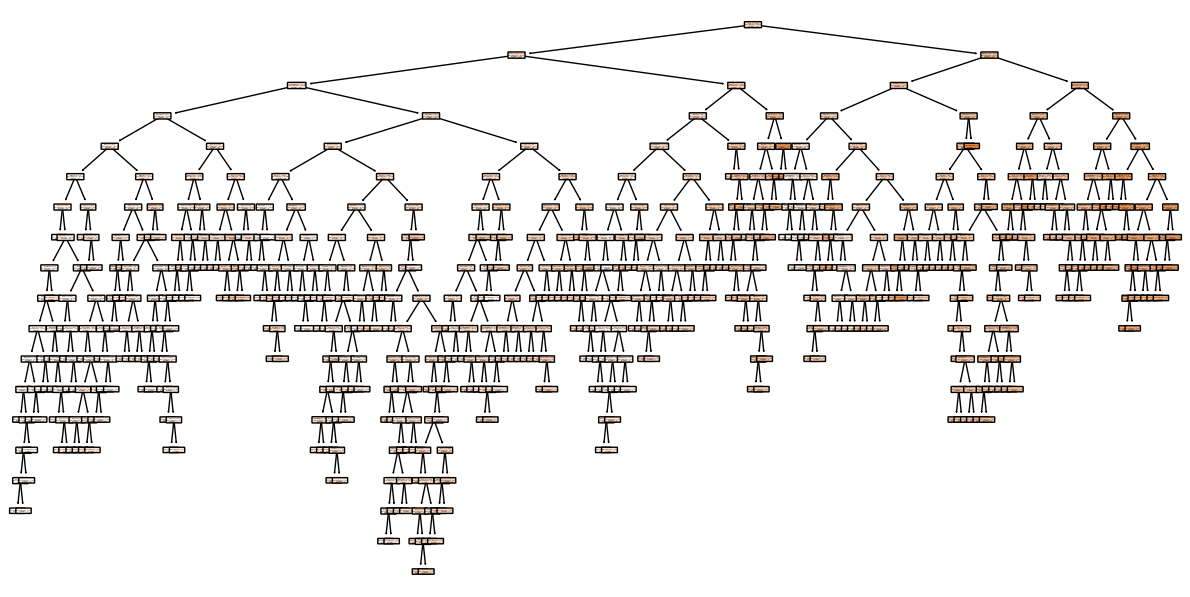

In [17]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt,
         filled=True,
         rounded=True,
         feature_names=X.columns);

#Tuning hyperparameter dengan RandomizedSearchCV

In [18]:
def randomized_search_clf(params, runs=100, clf=RandomForestRegressor(random_state=42)):

    # Instantiate GridSearchCV as grid_reg
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs,
                                   n_jobs=-1, random_state=42,scoring='neg_mean_squared_error')
    # Fit grid_reg on X_train and y_train
    rand_clf.fit(X_train, y_train)
    # Extract best estimator
    best_model = rand_clf.best_estimator_
    # Extract best score
    best_score = abs(rand_clf.best_score_)
    # Print best score
    print("Training MSE: {:.3f}".format(best_score))
    # Predict test set labels
    y_pred = best_model.predict(X_val)
    # Compute accuracy
    MSE = mean_squared_error(y_val, y_pred)
    # Print accuracy
    print('Validation MSE: {:.3f}'.format(MSE))
    # Return best model
    return best_model

In [19]:
randomized_search_clf(params={'max_depth':[2,4,6,8,10,12,None],
'max_features':['sqrt','log2',None],
'max_leaf_nodes':[30,35,40, None],
'min_samples_leaf':[1, 0.035, 0.04, 0.045, 0.05],
'min_samples_split':[2,3,5,7],
'n_estimators':[100,300,500]
})

Training MSE: 0.006
Validation MSE: 0.006


RandomForestRegressor(max_depth=8, max_features='log2', min_samples_split=3,
                      n_estimators=300, random_state=42)

In [20]:
clf_dt_pruned = RandomForestRegressor(max_depth=8, max_features='log2',
                      min_samples_split=3, n_estimators=300, random_state=42)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)

In [21]:
y_pred = clf_dt_pruned.predict(X_train)
mse=mean_squared_error(y_train,y_pred)
print(f'Train MSE: {mse:.3f}')
mae=mean_absolute_error(y_train,y_pred)
print(f'Train MAE: {mae:.3f}')

Train MSE: 0.002
Train MAE: 0.036


In [22]:
y_pred = clf_dt_pruned.predict(X_val)
mse=mean_squared_error(y_val,y_pred)
print(f'Validation MSE: {mse:.3f}')
mae=mean_absolute_error(y_val,y_pred)
print(f'Validation MAE: {mae:.3f}')

Validation MSE: 0.006
Validation MAE: 0.058


In [23]:
y_pred = clf_dt_pruned.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print(f'Test MSE: {mse:.3f}')
mae=mean_absolute_error(y_test,y_pred)
print(f'Test MAE: {mae:.3f}')

Test MSE: 0.008
Test MAE: 0.071


In [24]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 2.7 MB/s eta 0:00:00


In [25]:
from skopt import BayesSearchCV
def bayesian_opt_clf(params, runs=100, clf=RandomForestRegressor(random_state=42)):

    # Instantiate GridSearchCV as grid_reg
    rand_clf = BayesSearchCV(clf, params,
                                   n_jobs=-1, random_state=42,scoring='neg_mean_squared_error')
    # Fit grid_reg on X_train and y_train
    rand_clf.fit(X_train, y_train)
    # Extract best estimator
    best_model = rand_clf.best_estimator_
    # Extract best score
    best_score = abs(rand_clf.best_score_)
    # Print best score
    print("Training MSE: {:.3f}".format(best_score))
    # Predict test set labels
    y_pred = best_model.predict(X_val)
    # Compute accuracy
    MSE = mean_squared_error(y_val, y_pred)
    # Print accuracy
    print('Validation MSE: {:.3f}'.format(MSE))
    # Return best model
    return best_model

In [26]:
bayesian_opt_clf(params={'max_depth':[2,4,6,8,10,12,None],
'max_features':['sqrt','log2',None],
'max_leaf_nodes':[30,35,40, None],
'min_samples_leaf':[1, 0.035, 0.04, 0.045, 0.05],
'min_samples_split':[2,3,5,7],
'n_estimators':[100,300,500]
})

Training MSE: 0.006
Validation MSE: 0.006


RandomForestRegressor(max_depth=8, max_features='log2', min_samples_split=3,
                      n_estimators=500, random_state=42)

In [27]:
clf_dt_bayes = RandomForestRegressor(max_depth=8, max_features=None, n_estimators=500,
                       min_samples_split=3, random_state=42)
clf_dt_bayes = clf_dt_bayes.fit(X_train, y_train)

In [28]:
y_pred = clf_dt_bayes.predict(X_train)
mse=mean_squared_error(y_train,y_pred)
print(f'Train MSE: {mse:.3f}')
mae=mean_absolute_error(y_train,y_pred)
print(f'Train MAE: {mae:.3f}')

Train MSE: 0.001
Train MAE: 0.030


In [29]:
y_pred = clf_dt_bayes.predict(X_val)
mse=mean_squared_error(y_val,y_pred)
print(f'Validation MSE: {mse:.3f}')
mae=mean_absolute_error(y_val,y_pred)
print(f'Validation MAE: {mae:.3f}')



Validation MSE: 0.007
Validation MAE: 0.059


In [30]:
y_pred = clf_dt_bayes.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print(f'Test MSE: {mse:.3f}')
mae=mean_absolute_error(y_test,y_pred)
print(f'Test MAE: {mae:.3f}')

Test MSE: 0.008
Test MAE: 0.072


#Model1

In [31]:
#Mencari galat untuk data latih
y_pred_train = clf_dt.predict(X_train)
msetrain=mean_squared_error(y_train,y_pred_train)
maetrain=mean_absolute_error(y_train,y_pred_train)

#Mencari galat untuk data validasi
y_pred_validation = clf_dt.predict(X_val)
mseval=mean_squared_error(y_val,y_pred_validation)
maeval=mean_absolute_error(y_val,y_pred_validation)

#Mencari galat untuk data uji
y_pred_test = clf_dt.predict(X_test)
msetest=mean_squared_error(y_test,y_pred_test)
maetest=mean_absolute_error(y_test,y_pred_test)


In [32]:
#dijadiin df dulu koloomnya tiap tiap prediksi & tiap eror trus nanti juga dibedain nama dfnya tiap model jangan lupa kasih nama kolom juga

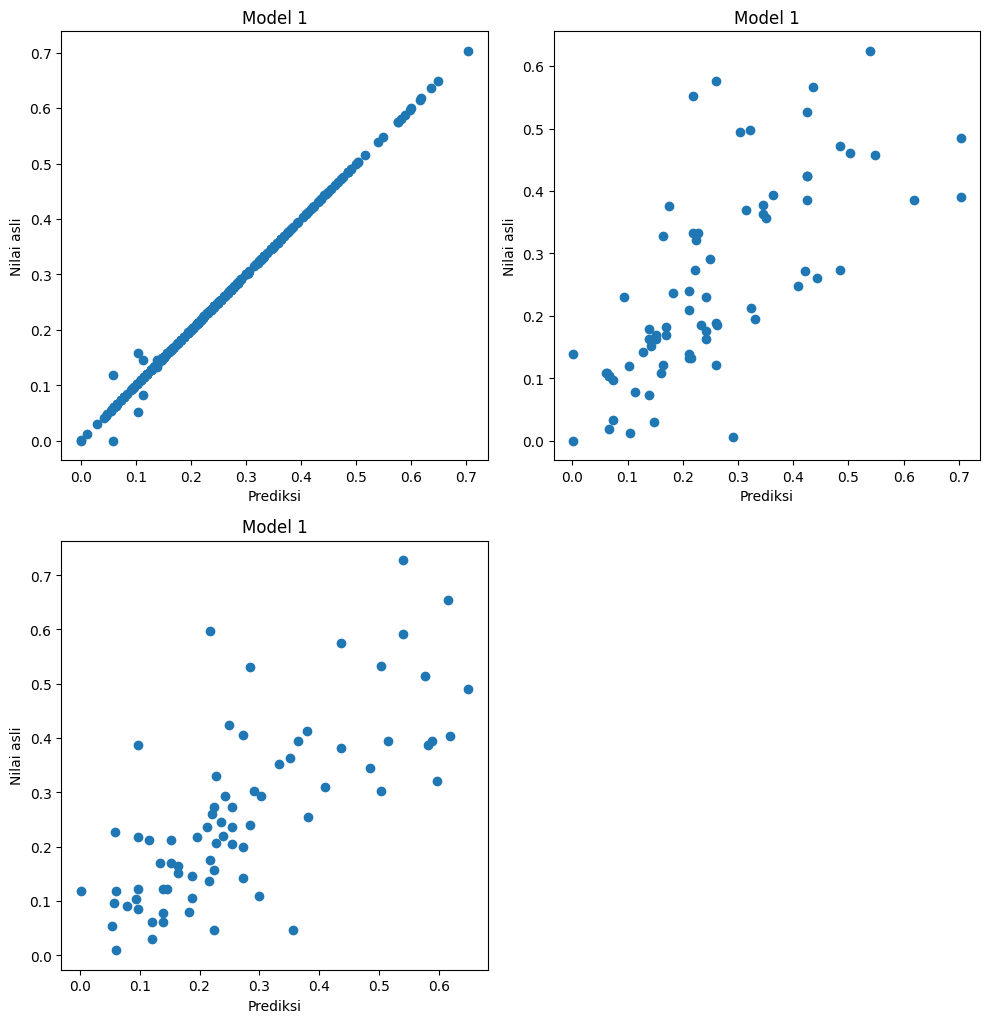

In [33]:
def scatter(x,y,fig):
    plt.subplot(3,2,fig)
    plt.scatter(x,y)
    plt.title('Model 1')
    plt.ylabel('Nilai asli')
    plt.xlabel('Prediksi')

plt.figure(figsize=(10,15))

scatter(y_pred_train,y_train, 1)
scatter(y_pred_validation,y_val, 2)
scatter(y_pred_test,y_test, 3)

plt.tight_layout()

#Model2

In [34]:
#Mencari galat untuk data latih
y_pred_train = clf_dt_pruned.predict(X_train)
msetrain=mean_squared_error(y_train,y_pred_train)
maetrain=mean_absolute_error(y_train,y_pred_train)

#Mencari galat untuk data validasi
y_pred_validation = clf_dt_pruned.predict(X_val)
mseval=mean_squared_error(y_val,y_pred_validation)
maeval=mean_absolute_error(y_val,y_pred_validation)

#Mencari galat untuk data uji
y_pred_test = clf_dt_pruned.predict(X_test)
msetest=mean_squared_error(y_test,y_pred_test)
maetest=mean_absolute_error(y_test,y_pred_test)

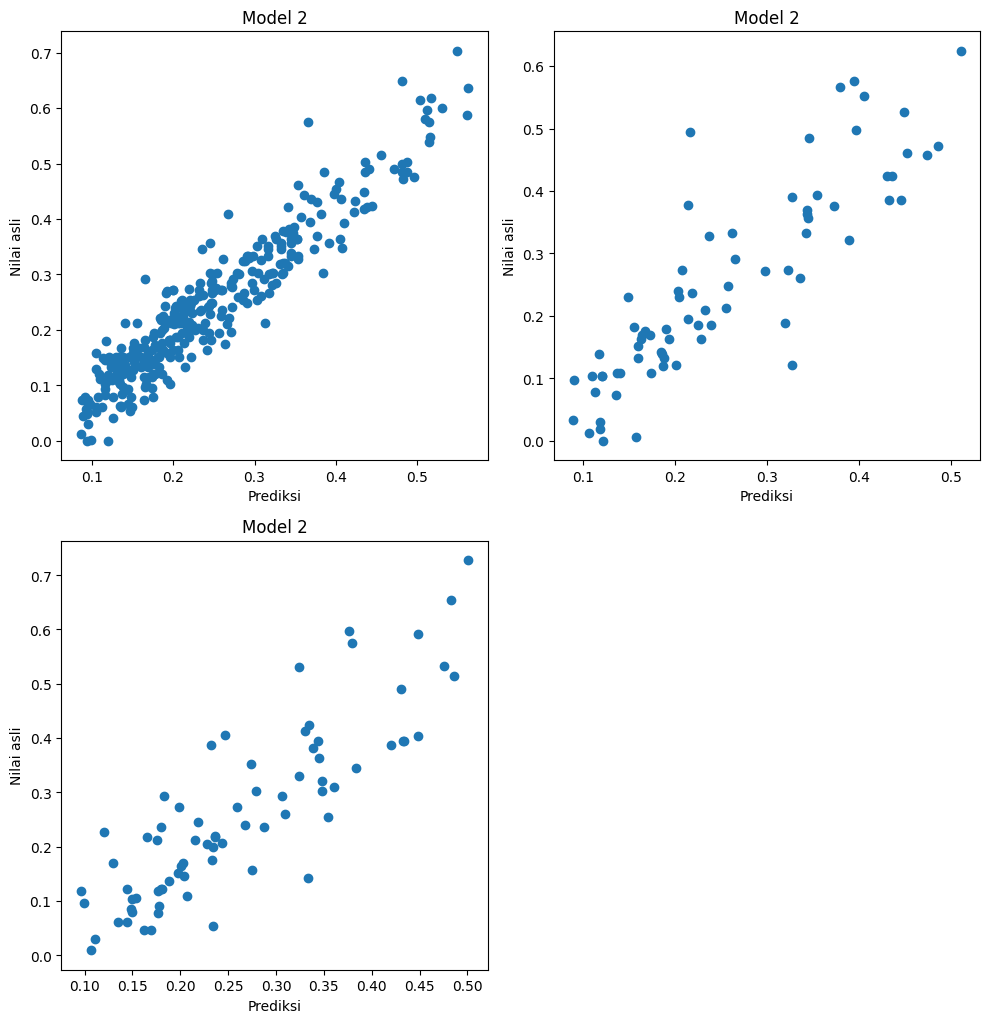

In [35]:
def scatter(x,y,fig):
    plt.subplot(3,2,fig)
    plt.scatter(x,y)
    plt.title('Model 2')
    plt.ylabel('Nilai asli')
    plt.xlabel('Prediksi')

plt.figure(figsize=(10,15))

scatter(y_pred_train,y_train, 1)
scatter(y_pred_validation,y_val, 2)
scatter(y_pred_test,y_test, 3)

plt.tight_layout()

#Model3


In [36]:
#Mencari galat untuk data latih
y_pred_train = clf_dt_bayes.predict(X_train)
msetrain=mean_squared_error(y_train,y_pred_train)
maetrain=mean_absolute_error(y_train,y_pred_train)

#Mencari galat untuk data validasi
y_pred_validation = clf_dt_bayes.predict(X_val)
mseval=mean_squared_error(y_val,y_pred_validation)
maeval=mean_absolute_error(y_val,y_pred_validation)

#Mencari galat untuk data uji
y_pred_test = clf_dt_bayes.predict(X_test)
msetest=mean_squared_error(y_test,y_pred_test)
maetest=mean_absolute_error(y_test,y_pred_test)

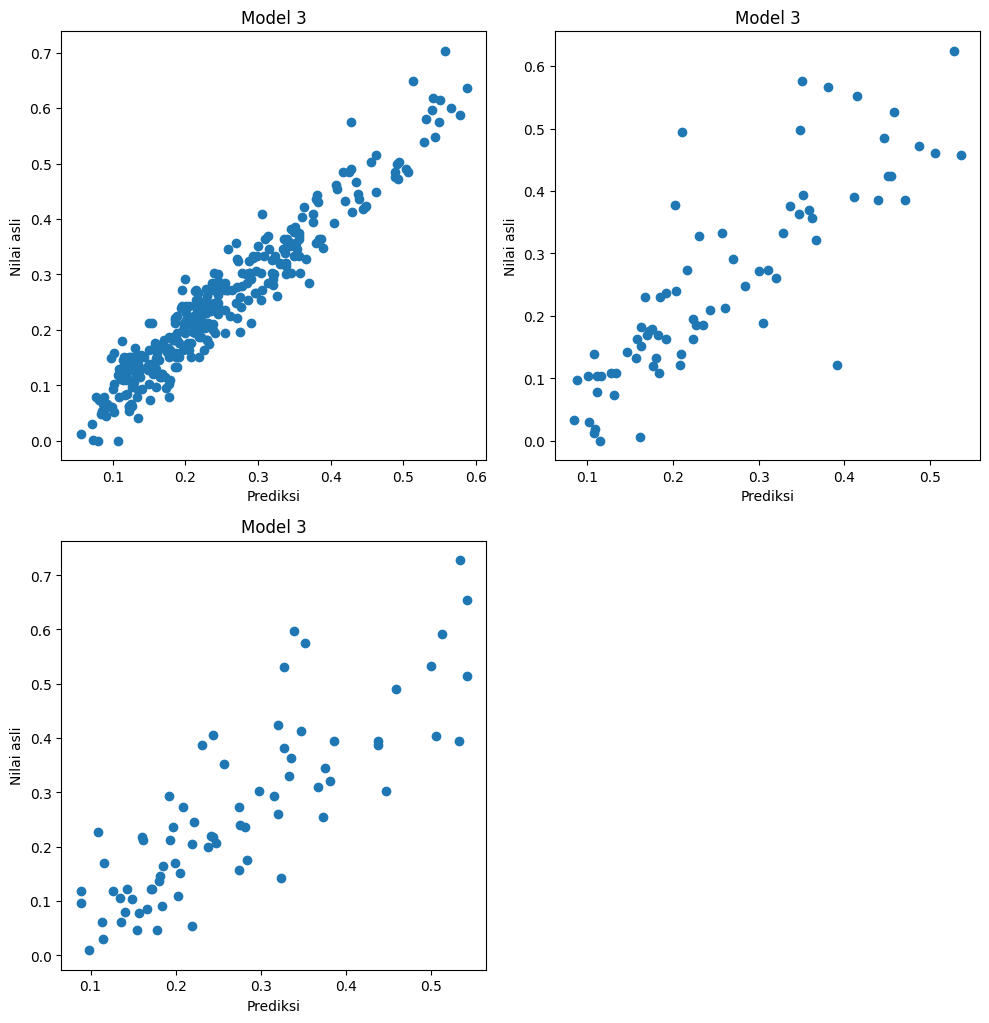

In [37]:
def scatter(x,y,fig):
    plt.subplot(3,2,fig)
    plt.scatter(x,y)
    plt.title('Model 3')
    plt.ylabel('Nilai asli')
    plt.xlabel('Prediksi')

plt.figure(figsize=(10,15))

scatter(y_pred_train,y_train, 1)
scatter(y_pred_validation,y_val, 2)
scatter(y_pred_test,y_test, 3)

plt.tight_layout()

In [38]:
#import joblib
#joblib.dump(clf_dt_pruned, 'randomforest_randomized.pkl')
#files.download('randomforest_randomized.pkl')

#joblib.dump(clf_dt_bayes, 'randomforest_bayes.pkl')
#files.download('randomforest_bayes.pkl')